In [2]:
# Add the directory containing the 'oset' package to the Python path
#sys.path.append(os.path.abspath(os.path.join('')))

In [3]:
import sys
import os
import numpy as np
from scipy.signal import find_peaks
import scipy.io as sio
import matplotlib.pyplot as plt
from oset.ecg import phase_calculator
from oset.generic.lp_filter.lp_filter_zero_phase import lp_filter_zero_phase
from oset.ecg.peak_detection.peak_det_simple import peak_det_simple
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [4]:
file_path = "../../../datasets/sample-data/SampleECG1.mat"
data = sio.loadmat(file_path)["data"][0]

In [5]:
f = 1
fs = 1000
fc = 0.5
t = np.arange(len(data)) / fs
data = data - lp_filter_zero_phase(data, fc / fs)
peaks, peak_indexes = peak_det_simple(data, f / fs)

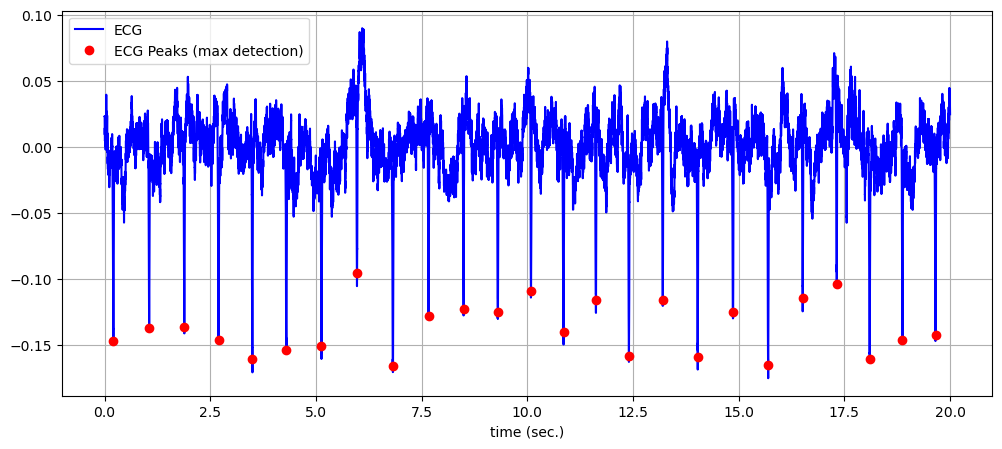

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(t, data, "b", label="ECG")
plt.plot(t[peak_indexes], data[peak_indexes], "ro", label="ECG Peaks (max detection)")
plt.xlabel("time (sec)")
plt.legend()
plt.grid()
plt.show()

In [7]:
# Calculate phases using the phase_calculator function
phase, phasepos = phase_calculator(peaks)

In [41]:
# Print the results
print("Phase:", phase[:20])  # Print first 20 values for brevity
print("Phaseops:", phasepos[:20])  # Print first 20 values for brevity

Phase: [-1.54663023 -1.53919451 -1.53175878 -1.52432306 -1.51688734 -1.50945162
 -1.5020159  -1.49458017 -1.48714445 -1.47970873 -1.47227301 -1.46483728
 -1.45740156 -1.44996584 -1.44253012 -1.4350944  -1.42765867 -1.42022295
 -1.41278723 -1.40535151]
Phaseops: [4.73655508 4.7439908  4.75142652 4.75886224 4.76629797 4.77373369
 4.78116941 4.78860513 4.79604086 4.80347658 4.8109123  4.81834802
 4.82578374 4.83321947 4.84065519 4.84809091 4.85552663 4.86296236
 4.87039808 4.8778338 ]


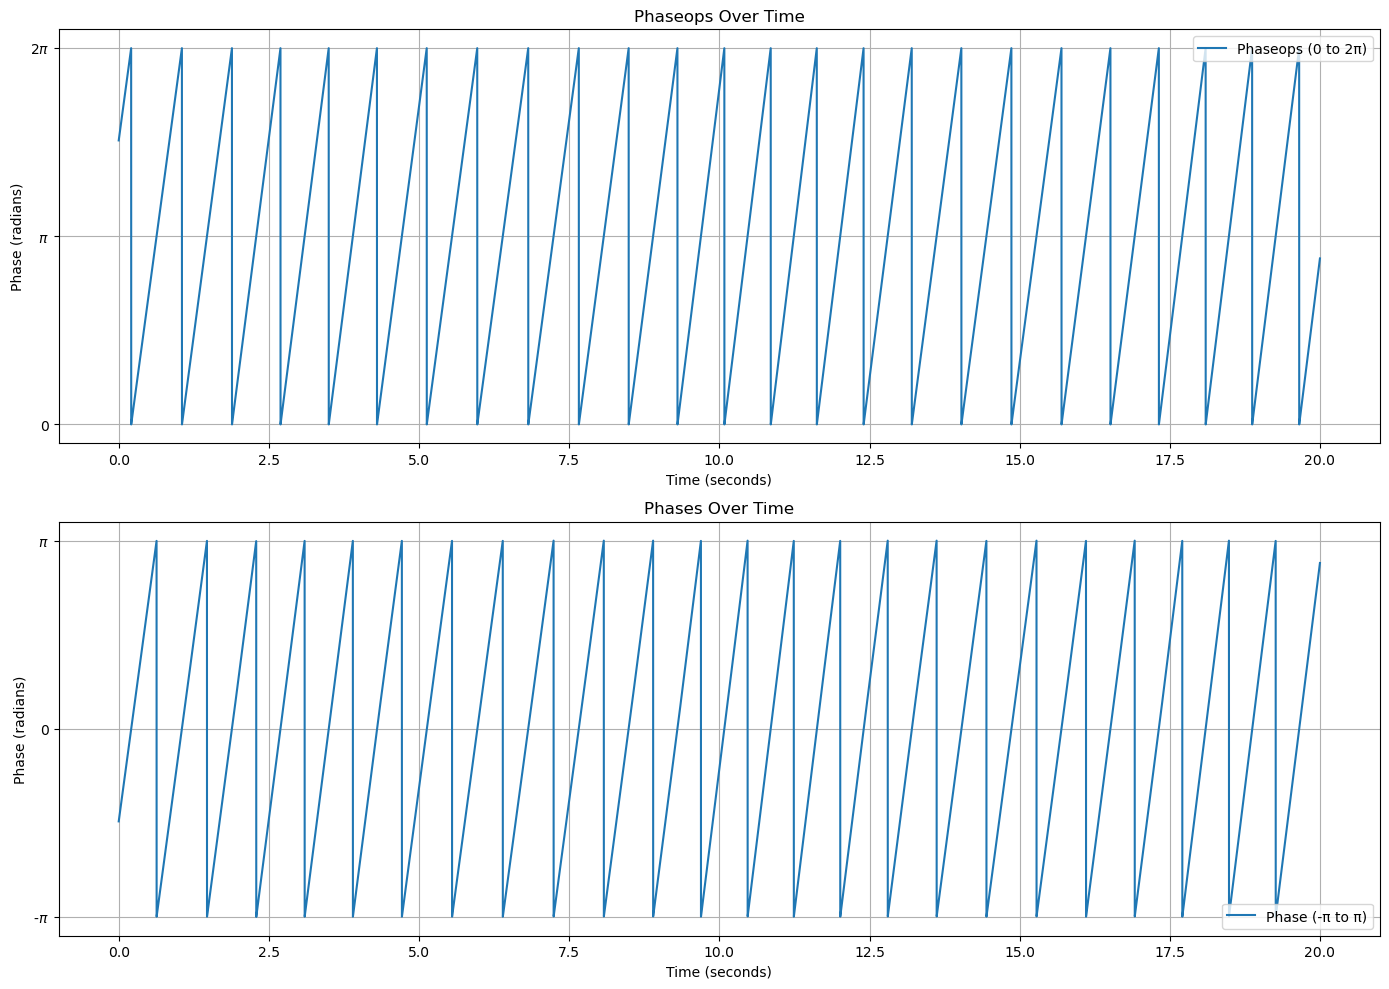

In [43]:
def format_func(value, tick_number):
    N = int(np.round(value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi$"
    elif N == -1:
        return r"-$\pi$"
    else:
        if N > 0:
            return r"${0}\pi$".format(N)
        else:
            return r"$-{0}\pi$".format(-N)

# Visualization

plt.figure(figsize=(14, 10))

# Plot Phaseops over time
plt.subplot(2, 1, 1)
plt.plot(t, phasepos, label='Phaseops (0 to 2π)')
plt.title('Phaseops Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Phase (radians)')
plt.legend()
plt.grid()
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

# Plot Phases over time
plt.subplot(2, 1, 2)
plt.plot(t, phase, label='Phase (-π to π)')
plt.title('Phases Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Phase (radians)')
plt.legend()
plt.grid()
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()
plt.show()

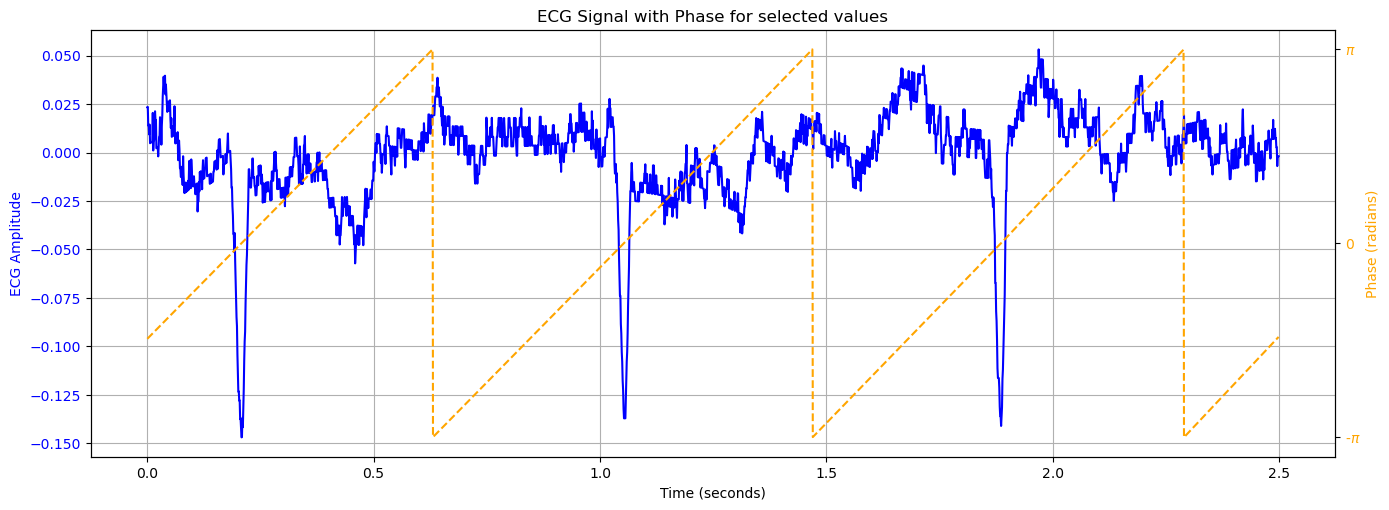

In [44]:
def format_func(value, tick_number):
    N = int(np.round(value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi$"
    elif N == -1:
        return r"-$\pi$"
    else:
        if N > 0:
            return r"${0}\pi$".format(N)
        else:
            return r"$-{0}\pi$".format(-N)

num_values_to_show = 2500
t_short = t[:num_values_to_show]
data_short = data[:num_values_to_show]
phase_short = phase[:num_values_to_show]

# Phase Superimposed on ECG with Separate Y-Axes for the first 3 values
fig, ax1 = plt.subplots(figsize=(14, 5))

# Plot ECG signal
ax1.plot(t_short, data_short, label='ECG Signal', color='blue')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('ECG Amplitude', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create a second y-axis to plot phase
ax2 = ax1.twinx()
ax2.plot(t_short, phase_short, '--', label='Phase (-π to π)', color='orange')
ax2.set_ylabel('Phase (radians)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax2.yaxis.set_major_locator(MultipleLocator(base=np.pi))
ax2.yaxis.set_major_formatter(FuncFormatter(format_func))

fig.tight_layout()
plt.title('ECG Signal with Phase for selected values')
plt.show()

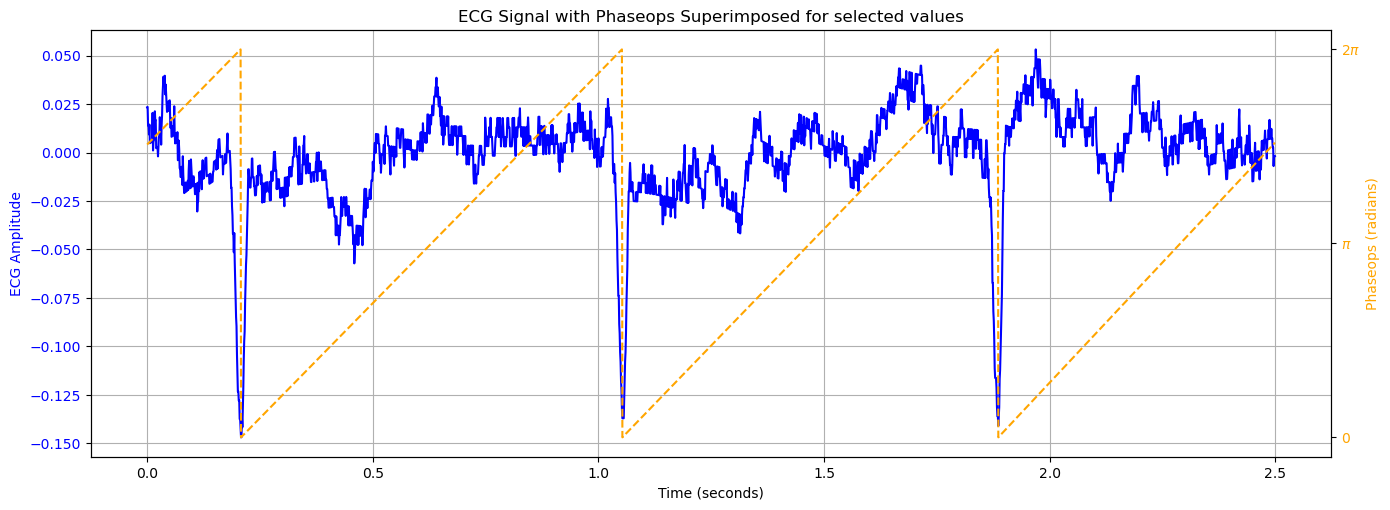

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FuncFormatter

def format_func(value, tick_number):
    N = int(np.round(value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi$"
    elif N == 2:
        return r"$2\pi$"
    elif N == -1:
        return r"-$\pi$"
    else:
        if N > 0:
            return r"${0}\pi$".format(N)
        else:
            return r"$-{0}\pi$".format(-N)

num_values_to_show = 2500
t_short = t[:num_values_to_show]
data_short = data[:num_values_to_show]
phasepos_short = phasepos[:num_values_to_show]

# Phaseops Superimposed on ECG with Separate Y-Axes for selected values
fig, ax1 = plt.subplots(figsize=(14, 5))

# Plot ECG signal
ax1.plot(t_short, data_short, label='ECG Signal', color='blue')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('ECG Amplitude', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create a second y-axis to plot phaseops
ax2 = ax1.twinx()
ax2.plot(t_short, phasepos_short, '--', label='Phaseops (0 to 2π)', color='orange')
ax2.set_ylabel('Phaseops (radians)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax2.yaxis.set_major_locator(MultipleLocator(base=np.pi))
ax2.yaxis.set_major_formatter(FuncFormatter(format_func))

fig.tight_layout()
plt.title('ECG Signal with Phaseops Superimposed for selected values')
plt.show()